### A propos du dataset


La dataset contient des informations sur l'argent dépensé en publicité et sur les ventes générées. L'argent a été dépensé en publicités à la télévision, à la radio et dans les journaux.

L'objectif est d'utiliser la régression linéaire pour comprendre l'impact des dépenses publicitaires sur les ventes.

### Importation des bibliothèques 

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

### Collecte de données : data collecting 


In [3]:
my_data=pd.read_csv("https://raw.githubusercontent.com/marcopeix/ISL-linear-regression/master/data/Advertising.csv")
my_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#supprimer la colonne Unnamed: 0
my_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
my_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploration des données : Data exploration 

In [7]:
my_data.shape

(200, 4)

In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
my_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


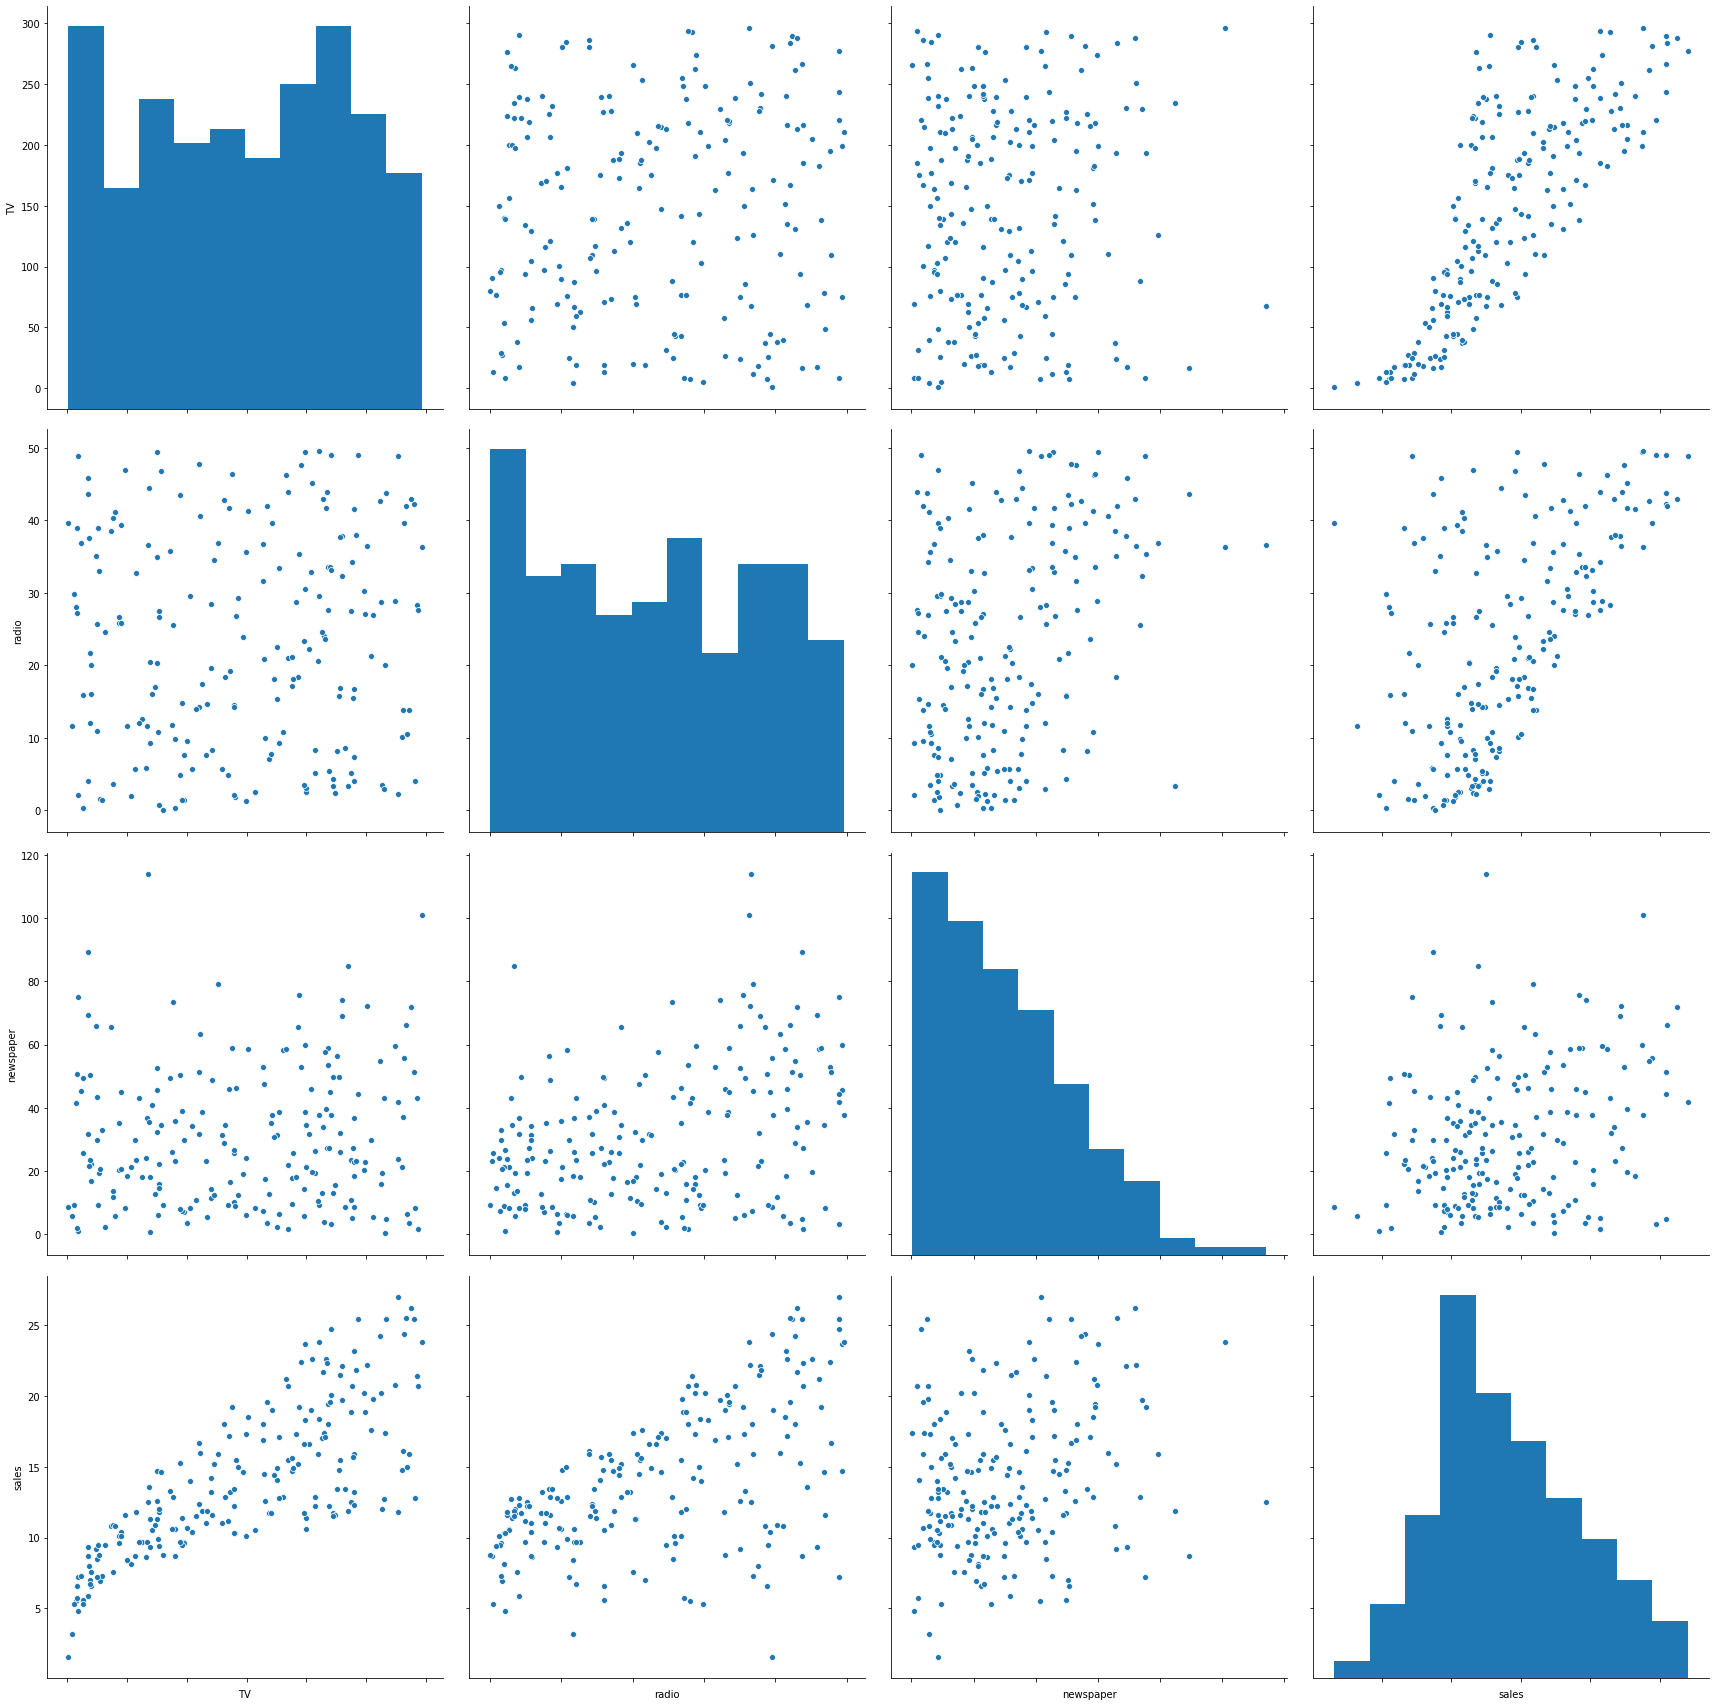

In [11]:
g = sns.pairplot(my_data,  palette='tab20',height=6)
g.set(xticklabels=[]);


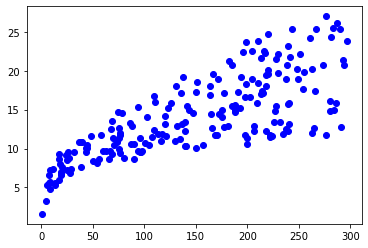

In [12]:
plt.scatter(my_data.TV,my_data.sales,color='blue')
plt.xlabel('l argent dépensé en publicités à la télévision')
plt.ylabel("les ventes")
plt.show()

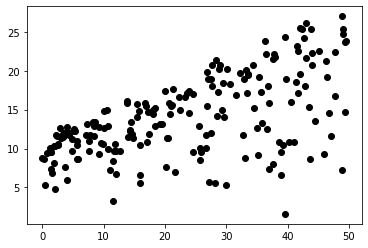

In [14]:
plt.scatter(my_data.radio,my_data.sales,color='black')
plt.xlabel('l argent dépensé en publicités à la radio')
plt.ylabel("les ventes")
plt.show()

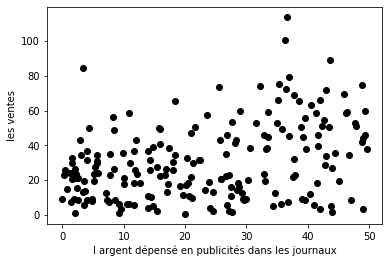

In [15]:
plt.scatter(my_data.radio,my_data.newspaper,color='black')
plt.xlabel('l argent dépensé en publicités dans les journaux')
plt.ylabel("les ventes")
plt.show()

Comme il est vu ,il existe une relation claire entre le montant dépensé pour les publicités télévisées et les ventes.
donc on va générer un model linéaire utilisant ces donées 

In [40]:
X=my_data['TV']
Y=my_data['sales']

In [41]:
x = np.array(X).reshape(-1,1)
y=np.array(Y)

In [42]:
from sklearn.model_selection import train_test_split 

In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression
Lr_model=LinearRegression()
Lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print("The linear model is: Y = {:.5} + {:.5}X".format(Lr_model.intercept_,Lr_model.coef_[0]))

The linear model is: Y = 7.0724 + 0.04719X


In [54]:
prediction=Lr_model.predict(X_test)

In [55]:
print("accuracy est : ",(r2_score(y_test,prediction)))

accuracy est :  0.6345414206917606


In [58]:
X = my_data['TV']
y = my_data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.47e-42
Time:                        19:35:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

En examinant les deux coefficients, nous avons une valeur p très faible . Cela signifie qu'il existe une forte corrélation entre ces coefficients et la caractériqtique cible (les ventes).

Ensuite, en regardant la valeur R², nous avons 0,612. Par conséquent, environ 60 % de la variabilité des ventes s'explique par le montant dépensé en publicités télévisées. C'est correct, mais ce n'est certainement pas le meilleur moyen de prédire les ventes avec précision. Il est certain que les dépenses consacrées aux annonces dans les journaux et à la radio doivent avoir un certain impact sur les ventes.


### Traçage des sorties : 

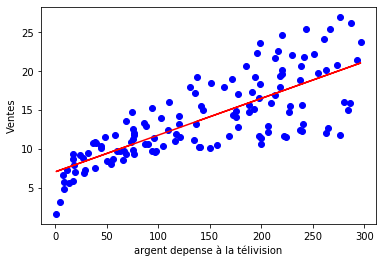

In [56]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, Lr_model.coef_[0]*X_train + Lr_model.intercept_, '-r')
plt.xlabel("argent depense à la télivision")
plt.ylabel("Ventes")
plt.show()

La tache suivante : 
Voyons si une régression linéaire multiple donnera de meilleurs résultats.


In [59]:
my_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [66]:
X=my_data.drop(["sales"],axis=1)


In [67]:
Y=my_data["sales"]

In [70]:
x=np.array(X)
y=np.array(Y)

In [71]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1)

In [72]:
Lr_model=LinearRegression()
Lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(Lr_model.intercept_, Lr_model.coef_[0], Lr_model.coef_[1], Lr_model.coef_[2]))

The linear model is: Y = 2.9453 + 0.045861*TV + 0.1823*radio + 0.0034493*newspaper


Bien sûr, nous ne pouvons pas visualiser l'impact des trois médias sur les ventes, car il comporte au total quatre dimensions.
Remarquez que le coefficient pour le journal est positif, mais aussi assez faible. Est-il pertinent pour notre modèle ? Voyons en calculant la statistique F, la valeur R² et la valeur p pour chaque coefficient

In [77]:
X = np.column_stack((my_data['TV'], my_data['radio'], my_data['newspaper']))
y = my_data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.58e-96
Time:                        19:49:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Comme il est vu, le R² est beaucoup plus élevé que celui de la régression linéaire simple, avec une valeur de 0,897 !
De plus, la statistique F est de 570,3. Ce chiffre est trés bien supérieur à 1, et comme notre ensemble de données est assez petit (seulement 200 points de données), il démontre qu'il existe une forte relation entre les dépenses publicitaires et les ventes.
Enfin, comme nous n'avons que trois prédicteurs, nous pouvons considérer leur valeur p pour déterminer s'ils sont pertinents pour le modèle ou non. Bien sûr, vous remarquez que le troisième coefficient (celui pour les journaux) a une p-value importante. Par conséquent, les dépenses publicitaires pour les journaux ne sont pas statistiquement significatives. Supprimer ce prédicteur réduirait légèrement la valeur R², mais nous pourrions faire de meilleures prévisions.

